[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/Ex05-NN-in-Keras.ipynb)





# Neural Networks using Keras


### Outline
Our goal is to build a NN for multi-class classification. We need to make several decisions when configuring our NN and focus on these when learning about Keras.
 1. number of hidden layers
 2. number of neurons in hidden layers
 3. activation functions
 4. type of weight initialization
 5. loss function
 6. learning rate and momentum
 6. optimizer
 7. size of batch
 8. number of epochs
 9. regularization (dropout)

In [ ]:
# Setting up the environment: import standard libraries and load the data.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
import pandas as pd

In [ ]:
# Select the app name as row index
# Load dataset and set app name as index
path = 'https://raw.githubusercontent.com/DaPlayfulQueen/DE_track_data/master/apple_store_reviews.csv'
app = pd.read_csv(path, index_col=False, sep='\t', encoding='utf-8')
app = app.set_index('track_name')
app.head()

,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,user_rating
track_name,,,,,,,,,,,,,,,,,,,,,
PAC-MAN Premium,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0
Evernote - stay organized,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,1,0,0,0,0,0,0,0,4.0
"WeatherBug - Local Weather, Radar, Maps, Alerts",-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,1,4.0
"eBay: Best App to Buy, Sell, Save! Online Shopping",-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,1,0,0,0,0,0,4.0
Bible,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,1,0,0,0,0,0,0,4.0


In [ ]:
type(app['user_rating'][0])

numpy.float64

In [ ]:
# Prepare the target variable
# LabelEncoder() transforms a string vector to a num vector
encoder = OneHotEncoder()
encoded_values = encoder.fit_transform(app[['user_rating']])
encoded_values = encoded_values.toarray()
target_df = pd.DataFrame(encoded_values, columns=[f'rating_{int(i)}' for i in encoder.categories_[0]])

app = app.reset_index(drop=True)
app = pd.concat([app, target_df], axis=1)
app.head(5)

,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,user_rating,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,0,0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,1,4.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,0,4.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = app.drop(['user_rating', 'rating_0', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5'], axis = 1)

In [ ]:
y = app[['rating_0', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']]

<Axes: xlabel='user_rating', ylabel='count'>

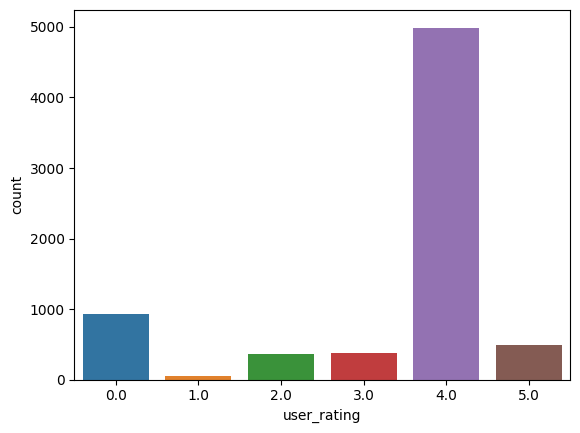

In [ ]:
#plot the Rating distribution as seen in the plot below
import seaborn as sns

sns.countplot(app, x='user_rating')

In [ ]:
# Let's split our data set in train and test and use random seed = 42 and 30% test size
# Keep in mind that this data set is already normalized, which leads to a leakage of information from train set to test set
# When you are working with a dataset, make sure you normalize the variables in test set according to the parameters of the train set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape)
print(y_train.shape)
X.head(5)

(5037, 35)
(5037, 6)


,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Preparing the Keras framework ###

We will revise the architecture of our basic neural network and look into the tuning of hyperparameters.



### 1+2: Number of hidden layers and number of neurons
The number of layers and the number of neurons is a parameter that you would have to decide on.

*Deep* neural network is the one with more than one layer, so we will use **2 hidden layers** this time.

As for neurons, look up for the industry practice, we are going for **n=128**.

In [ ]:
nb_units = 128

### 3: activation function ###
We will go for industry standard which is **relu** and keep a **softmax** at the end, given our multiclass task. We do not need to define those functions manually this time, Keras got our back.

IMPORTANT NOTE on output function for binary classification.
You could have two output neurons for every class and then run it through the softmax to aqcuire probabilities. However, the more efficient way (faster updating) would be to replace it with 1 neuron and a sigmoid function, which is basically a softmax for 2 classes:

$$y = \frac{1}{1 + e ^ {-x}} = \frac{1}{1 + \frac{1}{e ^ x}} = \frac{1}{\frac{e ^ x + 1}{e ^ x}} <= >\frac{e ^ x}{1 + e ^ x}  $$


### 4: weight initialisation
Weight initialization might seem minor but it can have a major impact on the convergence of the network.

At the picture: all weights are set to 0, second is the normally distributed weights with std=0.4.
In the rightmost plot, the weights are drawn from normal distributions with variances which are inversely proportional to the number of inputs into each neuron (he normal).

<img src="https://intoli.com/blog/neural-network-initialization/img/training-losses.png"  alt="fwe" style="width: 1000px;"/>

https://intoli.com/blog/neural-network-initialization/

We will be using the **He Normal initialization**, which is one of the industry standards and recommended for ReLu. It draws samples from a truncated normal distribution with $\mu=0$ and $ \sigma = \sqrt{2 / (i)}$, where $i$ is the number of input units in the weight tensor.

So in our case the standard deviation for our first weight matrix would be:

In [ ]:
# If you remember we previously used the (6/(35)) - we used the Glorot uniform (also called Xavier initialization)
std = np.sqrt(2/(X.shape[1]))
std

0.23904572186687872

## Let's put down what we have decided on already: ##
Keras offer you two "styles" of setting up the structure of your network (they call it two types of model): sequential and functional API (https://keras.io/models/about-keras-mod). It's a matter of preference in most cases.

Lets implement both to see their differences:

Starting with **sequential** when the layers follow sequentially one after the other, it is slightly leaner in notation.

In [ ]:
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

#set up the name of the model and its type
model = Sequential()

# Start adding layers one by one, add first a Dense Layer and specify
#number of neurons
#activation function
#initialisation of weights with kernel_initializer=keras.initializers.he_normal(seed=seed); check doc for more options
#initialization of biases with bias_initializer='zeros', will also be done by default
#set the input shape, i.e. number of features
model.add(Dense(units=128, input_dim=X.shape[1],
                kernel_initializer=keras.initializers.he_normal(seed=seed)))

# Add another Dense Layer
#One more layer with the same configuration
model.add(Dense(units=128,
                kernel_initializer=keras.initializers.he_normal(seed=seed)))

# And finally the outout layer as another Dense layer with number of neurosns = number of classes with the same configurations for weights and biases
model.add(Dense(units=y.shape[1], activation='softmax',
                kernel_initializer=keras.initializers.he_normal(seed=seed)))


######################let's see how our architecture looks like (also very helpful to learn how many parameters will be trained and compare to
#the size of your training set)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4608      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 21894 (85.52 KB)
Trainable params: 21894 (85.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's try to confirm these parameters manually. Print the numbers of

In [ ]:
# print the forumla that gives you the parameters for input to hidden layer
print(128 * (X.shape[1] + 1))

# print the forumla that gives you the parameters for first hidden to second hidden layer
print(128 * (128 + 1))


# print the forumla that gives you the parameters for second hidden to output layer
print(6 * (128 + 1))


4608
16512
774


Now implement the same Architecture using the functional API

In [ ]:
# Functional API analogue
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
hidden1 = Dense(128)(input_layer)
hidden2 = Dense(128)(hidden1)

output_layer = Dense(units=y.shape[1], activation='softmax')(hidden2)

model2 = Model(inputs=input_layer, outputs=output_layer)

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense_9 (Dense)             (None, 128)               4608      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 6)                 774       
                                                                 
Total params: 21894 (85.52 KB)
Trainable params: 21894 (85.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Wonderful, we have set up the infrastructure and can proceed with training
Most of the parameters that define the training process are set within the **compile** and **fit** methods.

The parameter optimization strategy is one of the most important choices for the training of the neural network.

We have already learned about one - stochastic gradient descent, it is considered the basic one. Improved performance can be achieved by using optimizers like **Rmsprop, Adagrad,  Adam**, etc.

### 5+6: loss function, learning rate and optimizer
The loss function is defined by the task (mse, binary crossentropy, etc.), in our case it is crossentropy.
Learning rate is set in the optimizer but does not have to remain the same throughout the training (i.e. AdaGrad).

In [ ]:
from keras import optimizers
from sklearn.utils.class_weight import compute_class_weight
# define the optimiter
# We use SGD as optimizer and cover more options later on, lets start with a learning rate of 0.01. There are many more parameters that we could be adding in the optimizer,
# but for now let us only declare the lr
opt = optimizers.SGD(learning_rate=0.01)

# Calling compile and specifying some mandatory arguments completes setting up the NN, ie. loss and metrics
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC(multi_label=True)])

### 7+8: batch size and epochs ###
Batch size is a chunk of data that would be fed into the optimizer. Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes update the weights more slowly, but lead to more stable convergence. Batch Gradient Descent (all samples used for one update), Online Stochastic Gradient Descent (one sample used for one update), Mini-batch Stochastic Gradient Descent (More than one but less than all samples used for one update).
Batch size determines how many examples you look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step.

Epochs is the number of rounds the algorithm will go through the entire dataset. Usually the more epochs of training, the better are the results, until the network starts to overfit. When you see the results flattening out, it's the time to stop.

In [ ]:
batch_size = 56 #1 for online SGD
epochs = 30

#And now we fit the model (that is the training part), mind that saving it to the
# variable will help you retrieve and analyse the training history

y_train_labels = np.argmax(y_train.values, axis=1)
classes = np.unique(y_train_labels)
class_weights = dict(zip(classes, compute_class_weight(class_weight ='balanced', classes=classes, y=y_train_labels)))


story = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, class_weight=class_weights)

Epoch 1/30
63/63 [==============================] - 2s 8ms/step - loss: 1.9305 - accuracy: 0.1645 - auc_4: 0.5302 - val_loss: 1.8042 - val_accuracy: 0.0933 - val_auc_4: 0.5794
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 1.8230 - accuracy: 0.1926 - auc_4: 0.5830 - val_loss: 1.8546 - val_accuracy: 0.0906 - val_auc_4: 0.5828
Epoch 3/30
63/63 [==============================] - 0s 8ms/step - loss: 1.7902 - accuracy: 0.2267 - auc_4: 0.5985 - val_loss: 1.7055 - val_accuracy: 0.2857 - val_auc_4: 0.5924
Epoch 4/30
63/63 [==============================] - 1s 9ms/step - loss: 1.7626 - accuracy: 0.2499 - auc_4: 0.6158 - val_loss: 1.6874 - val_accuracy: 0.3690 - val_auc_4: 0.5959
Epoch 5/30
63/63 [==============================] - 1s 10ms/step - loss: 1.7375 - accuracy: 0.3030 - auc_4: 0.6289 - val_loss: 1.7879 - val_accuracy: 0.2017 - val_auc_4: 0.5989
Epoch 6/30
63/63 [==============================] - 1s 8ms/step - loss: 1.7591 - accuracy: 0.2743 - auc_4: 0.6262 - val

The output already provides a lot of information how well your model performance and whether is shows tendencies of overfitting. You can also obtain such insight explicitly after the model has trained. For example, you can use *evaluate()* to compute model performance.

In [ ]:
#use evaluate to evaluate your model and check the output
def evaluate_model(model, X_train, X_test, y_train, y_test):
  train_metrics = model.evaluate(X_train, y_train, verbose=0)
  test_metrcis = model.evaluate(X_test, y_test, verbose=0)

  # print test loss and accuracy
  print(f'Train: loss={train_metrics[0]}, accuracy={train_metrics[1]}, auc={train_metrics[2]}')
  print(f'Test: loss={test_metrcis[0]}, accuracy={test_metrcis[1]}, auc={test_metrcis[2]}')

In [ ]:
evaluate_model(model, X_train, X_test, y_train, y_test)

Train: loss=1.5559306144714355, accuracy=0.49771690368652344, auc=0.6810726523399353
Test: loss=1.5732280015945435, accuracy=0.4652777910232544, auc=0.6570670008659363


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*. Use history on the variable 'story' you saved model.fit to and check its keys and values:

In [ ]:
story.history.keys()

dict_keys(['loss', 'accuracy', 'auc_4', 'val_loss', 'val_accuracy', 'val_auc_4'])

It is good practice to define custom functions to diagnose model performance and display results as needed. Here are some examples.

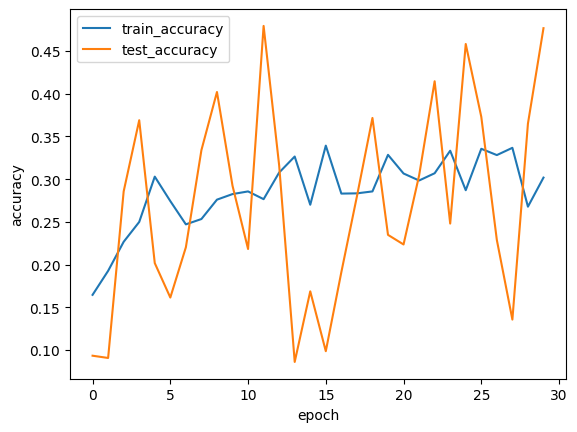

In [ ]:
def show_history(story):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(story)

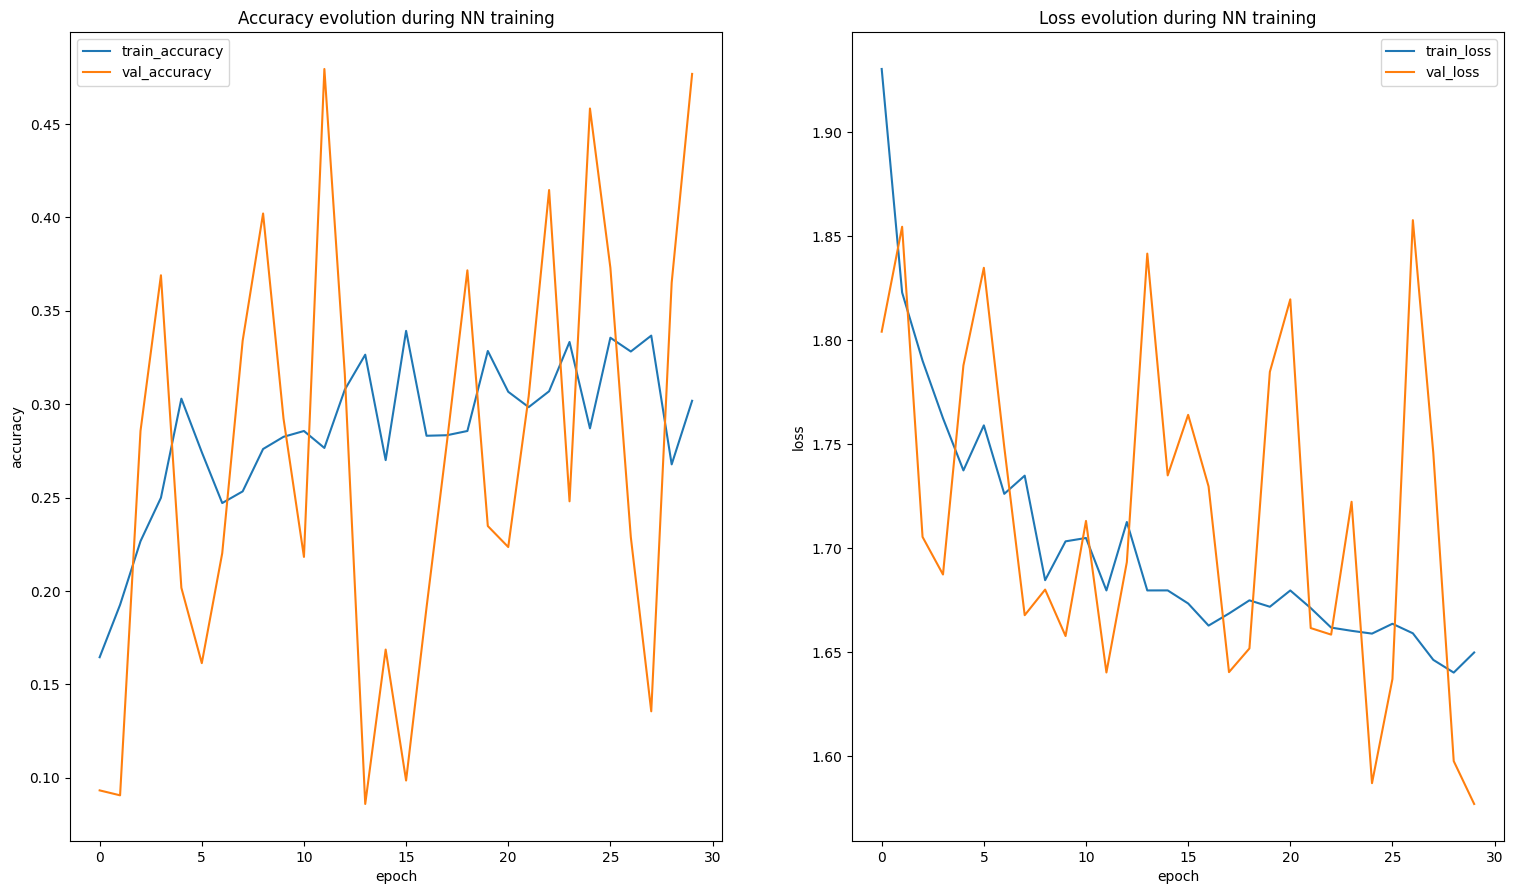

In [ ]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'val_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')

    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'val_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)


To get more insight and benefit from the full stack of performance measures that you know, we can simply calculate test set predictions explicitly and then proceed with these in the usual way, producing ROC curves, confusion tables, and the like.

In [ ]:
# Compute predictions and save them in yhat
yhat = model.predict(X_test)
yhat.shape

68/68 [==============================] - 0s 1ms/step


(2160, 6)

In [ ]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[5 2 4 ... 2 3 3]


In [ ]:
pd.crosstab(index=app["user_rating"],columns="count")

col_0,count
user_rating,
0.0,929
1.0,44
2.0,358
3.0,383
4.0,4991
5.0,492


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Grade 0","Grade 1","Grade 2","Grade 3","Grade 4","Grade 5"]
true_label = np.argmax(yhat, axis=1)
#print the following classification report
y_test_int = np.argmax(y_test.to_numpy(), axis=1)
print(classification_report(y_test_int, true_label, target_names=target_names))


              precision    recall  f1-score   support

     Grade 0       0.31      0.35      0.33       282
     Grade 1       0.02      0.10      0.04        20
     Grade 2       0.09      0.22      0.12       110
     Grade 3       0.09      0.21      0.13       117
     Grade 4       0.80      0.56      0.66      1489
     Grade 5       0.14      0.15      0.15       142

    accuracy                           0.47      2160
   macro avg       0.24      0.27      0.24      2160
weighted avg       0.61      0.47      0.52      2160



[[ 99  14  35  30  91  13]
 [  6   2   7   3   1   1]
 [ 19   7  24  31  19  10]
 [ 16   6  32  25  32   6]
 [162  52 170 176 834  95]
 [ 21   5  11  12  72  21]]


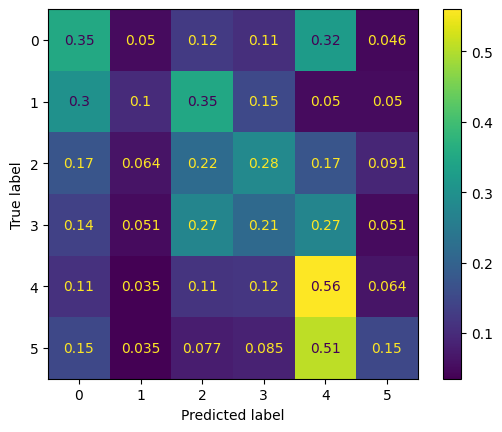

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  cm_proportions = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  ConfusionMatrixDisplay(confusion_matrix=cm_proportions).plot()

display_confusion_matrix(y_test_int, true_label)

### 9: dropout
Dropout 'impedes' the model and can be used against overfitting. It randomly sets a fraction rate of input units to 0 at each update during training time, which is a manner of regularization. Let's add up the Dropout rates after the hidden layers.



In [ ]:
def build_base_dropout_model():
  model = Sequential()


  model.add(Dense(units=128, input_dim=X.shape[1],
                  kernel_initializer=keras.initializers.he_normal(seed=seed)))
  model.add(Dropout(0.1))


  model.add(Dense(units=128,
                  kernel_initializer=keras.initializers.he_normal(seed=seed)))
  model.add(Dropout(0.1))

  model.add(Dense(units=y.shape[1], activation='softmax',
                  kernel_initializer=keras.initializers.he_normal(seed=seed)))

  return model

In [ ]:
# fit and evaluate the model
model3 = build_base_dropout_model()
model3.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC()])
story3 = model3.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
#print Test Loss and Accuracy
#plot the history using the above defined function show_history( )
evaluate_model(model3, X_train, X_test, y_train, y_test)
show_history(story3)

### more on optimizers

So far we have mainly been looking at the SGD as our optimization algorithm, but there are many more: Adam, RMSprop, Adagrad, etc. (some more info here http://ruder.io/optimizing-gradient-descent/). Like other tools they all have their strengths and weaknesses. We will look more into Adam:

In [ ]:
# build the same model as before, including the Dropout Layers, but now instead of SGD, choose Adam with a lr=0.01 as optimizer.
# fit and evaluate the model
from keras import optimizers
model4 = build_base_dropout_model()
model4.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC()])
story4 = model4.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
evaluate_model(model4, X_train, X_test, y_train, y_test)
show_history(story4)

### 10: momentum and learning rate


Learning rate has been overlooked for a while but currently a lot of research is looking into it.
Lower LR takes more time but allows better allocation of local minimum, higher LR allows faster calculations but drastic jumps do not always yield good results. However, learning rate doesn't have to be remained constant. We will try different learning rate schedules for our NN.

The SGD optimization algorithm in Keras has an argument called **decay**. This argument is used in the time-based learning rate decay schedule equation as follows:
LearningRate = LearningRate * 1/(1 + decay * epoch) (if decay=0 then there is no change)

Another term to know is **momentum**. Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.

$$\Delta  W_k(i) = -\eta  \frac{\partial E}{\partial W_k} + \mu  \Delta W_k(i-1)$$


$\mu$ is a momentum term here. Imagine if at some point gradient is zero, it would put the backpropagation to stall. Here momentum comes to the rescue - the algorithm remembers its last step, and adds some proportion of it to the current step. This way, even if the algorithm is stuck in a flat region, or a small local minimum, it can get out and continue towards the global minimum. So learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step.



In [ ]:
from keras.optimizers.legacy.SGD import SGD
# rebuild the model with Dropout Layers as before
model5 = build_base_dropout_model()


# Compile the model using SGD as optimizer with the following parameters
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

model5.compile(optimizer=optimizers.SGD(learning_rate=0.01, decay=decay_rate, momentum=momentum), loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC()])
story5 = model5.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)


# Fit and evaluate the model




In [ ]:
# print test loss and accuracy and plit results with show_history()

## Early stopping

In [ ]:
from keras.callbacks import EarlyStopping
# define a Callback in teh following way
cb=EarlyStopping(monitor='val_loss', min_delta=0.1, verbose=0, patience=10, restore_best_weights=True) #difference of loss is below min_delta, it is quantified as no improvement

#fit the previous model using the above defined callback


# evaluate the model


In [ ]:
#print loss and accuracy and plot it using show_history()